<a href="https://colab.research.google.com/github/vennela28/MLnow_2.0/blob/main/ScoresHours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Agenda**:

Given hours of study, predict the scores obtained.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/Univariate_Linear_Regression'

/content/drive/MyDrive/Univariate_Linear_Regression


In [3]:
import pandas as pd #work with csv or excel files
import numpy as np #work with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [5]:
scores = pd.read_csv('student_scores.csv', sep = ',')

In [6]:
scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
scores.shape

(25, 2)

In [11]:
scores.isnull().values.any()

False

In [12]:
scores[scores.duplicated()]

,Hours,Scores


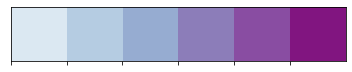

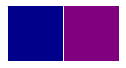

In [13]:
import seaborn as sns
sns.palplot(sns.color_palette('BuPu')) #Blue to Purple colors
pal = sns.color_palette('BuPu', 7) #print 7 color shades from Blue to Purple
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#00008B', '#800080'] #Blue Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

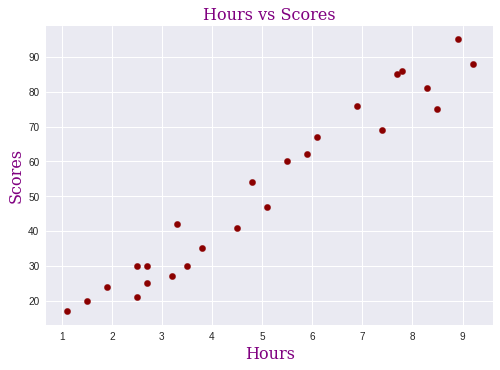

<Figure size 2880x2880 with 0 Axes>

In [15]:
plt.grid(True)
font = {'family': 'serif',
        'color':  'purple',
        'weight': 'normal',
        'size': 16,
        }
plt.scatter(scores['Hours'],scores['Scores'],s=40,color='darkred')
plt.title('Hours vs Scores',fontdict=font)
plt.xlabel('Hours',fontdict=font)
plt.ylabel('Scores',fontdict=font)
plt.figure(figsize=(40,40))
plt.show()

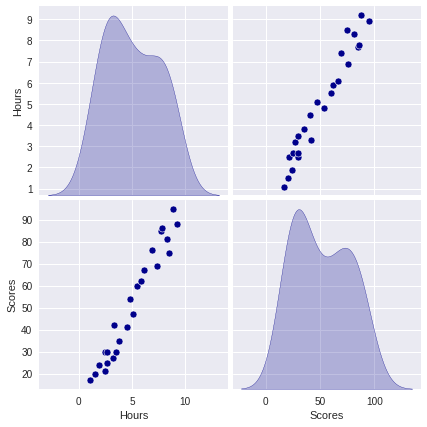

In [16]:
sns.pairplot(scores,x_vars=['Hours','Scores'],y_vars=['Hours','Scores'],diag_kind='kde',palette="hls",height=3)

In [17]:
scores.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


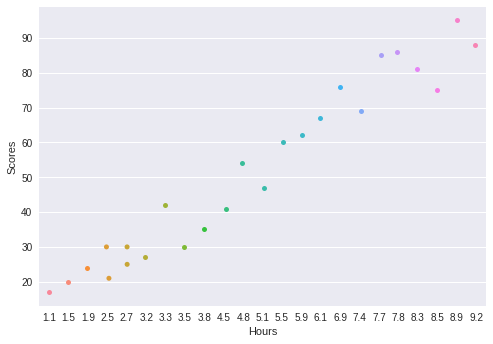

In [18]:
sns.stripplot(x = 'Hours', y = 'Scores', data = scores)

In [20]:
#80-20 train-test percent split

trainDataset = scores.sample(frac=0.8, random_state=0) 
testDataset = scores.drop(trainDataset.index)

print(trainDataset.shape)
print(testDataset.shape)

(20, 2)
(5, 2)


In [21]:
trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

In [22]:
trainLabels = trainFeatures.pop('Scores')
testLabels = testFeatures.pop('Scores')

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(trainFeatures,trainLabels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
scorePredicted = regressor.predict(testFeatures)           #Predict the scores
print(scorePredicted)

[27.49308148 86.20957221 47.06524505 90.12400492 50.00106959]


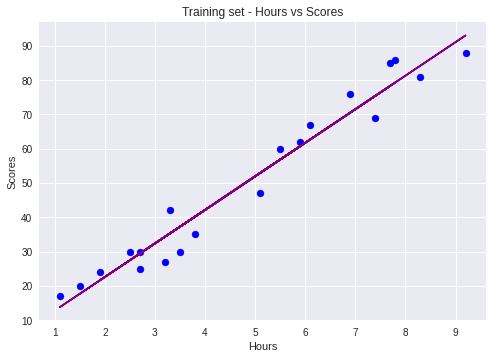

In [30]:
plt.grid(True)
plt.scatter(trainFeatures, trainLabels, color = 'blue')
plt.plot(trainFeatures, regressor.predict(trainFeatures), color = 'purple')
plt.title('Training set - Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

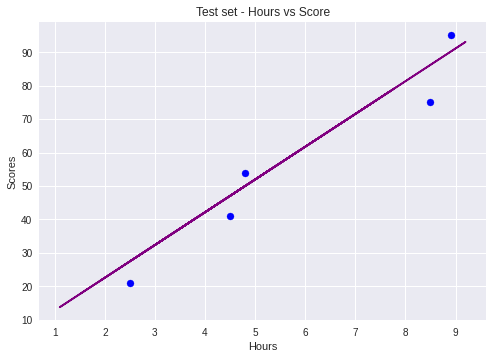

In [31]:
plt.grid(True)
plt.scatter(testFeatures, testLabels, color = 'blue')
plt.plot(trainFeatures, regressor.predict(trainFeatures), color = 'purple')
plt.title('Test set - Hours vs Score')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [32]:
a = regressor.score(trainFeatures, trainLabels)*100
b = regressor.score(testFeatures, testLabels)*100
print("Train Accuracy =",a)
print("Test Accuracy =",b)

Train Accuracy = 95.88089453328028
Test Accuracy = 92.65895859969137


In [34]:
compare = pd.DataFrame({"actual_y" : testLabels, "predicted_y" : scorePredicted})
compare

,actual_y,predicted_y
0,21,27.493081
3,75,86.209572
12,41,47.065245
15,95,90.124005
21,54,50.001070


In [38]:
from sklearn import metrics
print("Mean Squared Error : ",metrics.mean_squared_error(testLabels, scorePredicted))
print("Mean Absolute Error : ",metrics.mean_absolute_error(testLabels, scorePredicted))
print("R squared value is :",regressor.score(testFeatures, scorePredicted))

Mean Squared Error :  48.87371722669467
Mean Absolute Error :  6.52856484554344
R squared value is : 1.0


In [45]:
prediction=regressor.predict([[8.5]])
print("For 8.5 hours of study the student will score be " + str(prediction[0]))

For 8.5 hours of study the student will score be 86.20957220585188
